## Credit Risk Classification Using Random Search

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Pemodelan

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/SKRIPSI-2023/Code Fix/Dataset/dataROS.csv')
data.head()

,Unnamed: 0,Umur,Pendapatan,KepemilikanRumah,LamaKerja,TujuanPeminjaman,HasilPemeriksaanBackground,JumlahPinjaman,SukuBunga,HistoryKegagalan,JumlahHistoriPeminjaman,Konfirmasi%Pendapatan,StatusPinjaman
0,0,-0.714286,-1.049351,3,0.2,2.0,2,-0.833333,-0.110769,1,2.0,0.104167,0.0
1,1,-0.142857,-1.049351,1,-0.6,4.0,3,-0.333333,0.225425,1,3.0,0.572917,1.0
2,2,-0.428571,0.402597,4,0.0,4.0,3,2.944444,0.684049,1,2.0,0.534351,1.0
3,3,-0.285714,0.114286,4,0.8,4.0,3,2.944444,0.497490,2,4.0,0.643382,1.0
4,4,-0.714286,-1.041558,3,-0.4,6.0,1,-0.666667,-0.888097,1,2.0,0.252525,1.0


In [ ]:
data = data.drop(columns=['Unnamed: 0'])
data.head()

,Umur,Pendapatan,KepemilikanRumah,LamaKerja,TujuanPeminjaman,HasilPemeriksaanBackground,JumlahPinjaman,SukuBunga,HistoryKegagalan,JumlahHistoriPeminjaman,Konfirmasi%Pendapatan,StatusPinjaman
0,-0.714286,-1.049351,3,0.2,2.0,2,-0.833333,-0.110769,1,2.0,0.104167,0.0
1,-0.142857,-1.049351,1,-0.6,4.0,3,-0.333333,0.225425,1,3.0,0.572917,1.0
2,-0.428571,0.402597,4,0.0,4.0,3,2.944444,0.684049,1,2.0,0.534351,1.0
3,-0.285714,0.114286,4,0.8,4.0,3,2.944444,0.497490,2,4.0,0.643382,1.0
4,-0.714286,-1.041558,3,-0.4,6.0,1,-0.666667,-0.888097,1,2.0,0.252525,1.0


In [ ]:
data['StatusPinjaman'].value_counts()

0.0    25429
1.0    25429
Name: StatusPinjaman, dtype: int64

In [ ]:
data.shape

(50858, 12)

In [ ]:
x = data.drop(columns='StatusPinjaman')
y = data['StatusPinjaman']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y ,train_size=0.7, stratify=y, random_state=42)

In [ ]:
x_train.shape,x_test.shape

((35600, 11), (15258, 11))

Parameter RF dicari teori

Jurnal HT RF

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
criterion= ['gini', 'entropy', 'log_loss']
max_features = ['None', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(5, 55, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10, 20]
min_samples_leaf = [1, 2, 4, 8, 10]

In [ ]:
param_random = {
    'n_estimators': n_estimators,
    'criterion': criterion,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
    }

print(param_random)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, None], 'max_features': ['None', 'sqrt', 'log2'], 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [1, 2, 4, 8, 10]}


In [ ]:
model_random = RandomForestClassifier()

In [ ]:
RS_model_random = RandomizedSearchCV(estimator = model_random, param_distributions = param_random, scoring = 'accuracy', n_jobs=-1, verbose=10)

In [ ]:
RS_model_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, 55, None],
                                        'max_features': ['None', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 8, 10],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   scoring='accuracy', verbose=10)

In [ ]:
print('Best parameters found: ', RS_model_random.best_params_)
print('Best accuracy found: ', RS_model_random.best_score_)

Best parameters found:  {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'log_loss'}
Best accuracy found:  0.9584269662921348


In [ ]:
best_model = RS_model_random.best_estimator_
test_accuracy = best_model.score(x_test, y_test)
print('Test accuracy: ', test_accuracy)

Test accuracy:  0.9705728142613711


### EVALUASI

In [ ]:
train_predict = best_model.predict(x_train)
test_predict = best_model.predict(x_test)

In [ ]:
train_acc = accuracy_score(y_train, train_predict)
test_acc = accuracy_score(y_test, test_predict)

print(f"Akurasi pada data training: {train_acc:}")
print(f"Akurasi pada data testing: {test_acc:}")

Akurasi pada data training: 0.996685393258427
Akurasi pada data testing: 0.9705728142613711


In [ ]:
import time

start_time = time.time()

y_pred = best_model.predict_proba(x_test)

end_time = time.time()

elapsed_time = end_time - start_time

print("Hasil Prediksi:", y_pred)
print("Waktu Prediksi:", elapsed_time, "detik")

Hasil Prediksi: [[0.00133333 0.99866667]
 [0.87463333 0.12536667]
 [0.91078598 0.08921402]
 ...
 [0.91891212 0.08108788]
 [0.93182857 0.06817143]
 [0.94614286 0.05385714]]
Waktu Prediksi: 2.95304536819458 detik


In [ ]:
y_pred = best_model.predict_proba(x_test)
y_pred_train = best_model.predict_proba(x_train)

In [ ]:
y_pred = y_pred[:, 1]
y_pred_train = y_pred_train[:, 1]

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc)

AUC: 0.99


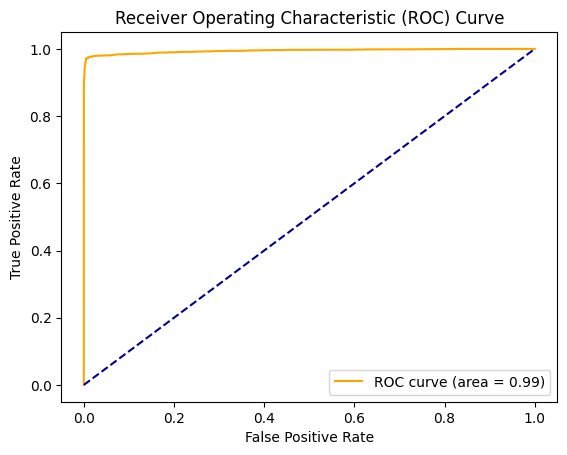

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

In [ ]:
y_pred1 = (y_pred > 0.5)*1
y_pred1

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred_train1 = (y_pred_train > 0.5)*1
y_pred_train1

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred1)
print(accuracy)

0.9786996985188098


tambahin Class Report Data Training

In [ ]:
class_report_train = classification_report(y_train, y_pred_train1)
print('Classification Report:\n', class_report_train)

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17800
         1.0       1.00      1.00      1.00     17800

    accuracy                           1.00     35600
   macro avg       1.00      1.00      1.00     35600
weighted avg       1.00      1.00      1.00     35600



In [ ]:
class_report = classification_report(y_test, y_pred1)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      7629
         1.0       0.98      0.98      0.98      7629

    accuracy                           0.98     15258
   macro avg       0.98      0.98      0.98     15258
weighted avg       0.98      0.98      0.98     15258



In [ ]:
cmd = confusion_matrix(y_test, y_pred1)
cmd_train = confusion_matrix(y_train, y_pred_train1)

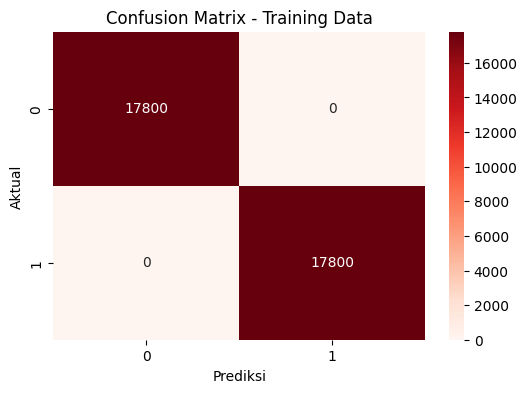

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cmd_train, annot=True, fmt ='d', cmap='Reds')
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

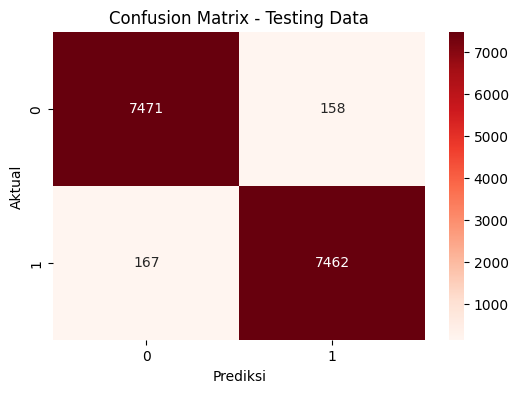

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cmd, annot=True, fmt ='d', cmap='Reds')
plt.title('Confusion Matrix - Testing Data')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [ ]:
# import pickle

# with open('best_model.pkl', 'wb') as f:
#   pickle.dump(best_model, f)